In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv('C:/Users/Dell/OneDrive/Desktop/DMO/TCS.NS.csv',usecols=[3,4,5])
df

,Low,Close,Adj Close
0,3309.000000,3335.500000,3228.370850
1,3292.000000,3332.600098,3225.563965
2,3321.449951,3355.350098,3247.583252
3,3317.750000,3349.000000,3241.437256
4,3321.000000,3343.449951,3236.065430
...,...,...,...
244,3366.000000,3370.449951,3370.449951
245,3369.550049,3381.550049,3381.550049
246,3342.050049,3347.449951,3347.449951
247,3322.350098,3333.449951,3333.449951


In [10]:
df.columns

Index(['Low', 'Close', 'Adj Close'], dtype='object')

<h3>Train Test Split</h3>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Adj Close', axis=1),
                                                    df['Adj Close'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((174, 2), (75, 2))

<h2>Normalization</h2>

In [20]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [22]:
np.round(X_train.describe(), 1)

,Low,Close
count,174.0,174.0
mean,3324.7,3351.1
std,117.4,118.8
min,3070.2,3089.6
25%,3231.9,3259.5
50%,3326.6,3348.2
75%,3407.2,3438.4
max,3601.4,3628.9


In [23]:
np.round(X_train_scaled.describe(), 1)

,Low,Close
count,174.0,174.0
mean,0.5,0.5
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.3
50%,0.5,0.5
75%,0.6,0.6
max,1.0,1.0


<h2>Effect of Scaling</h2>

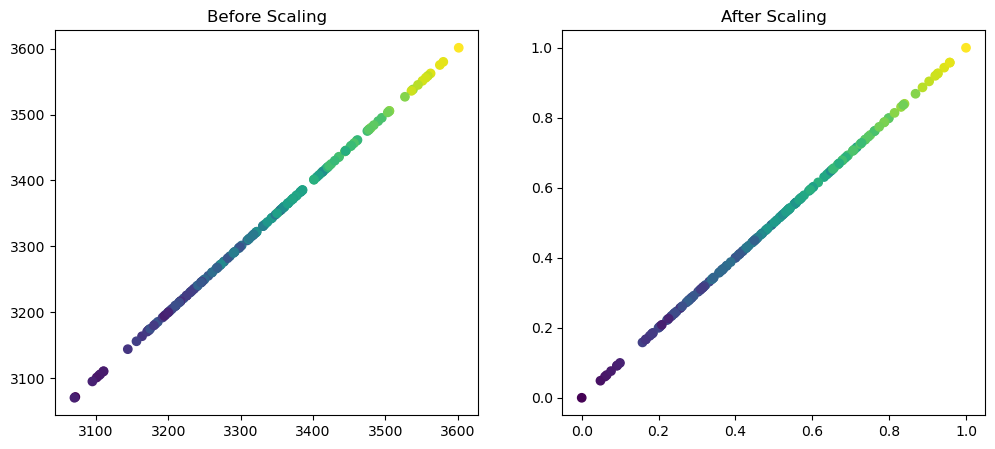

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Low'], X_train['Low'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Close'], X_train_scaled['Close'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

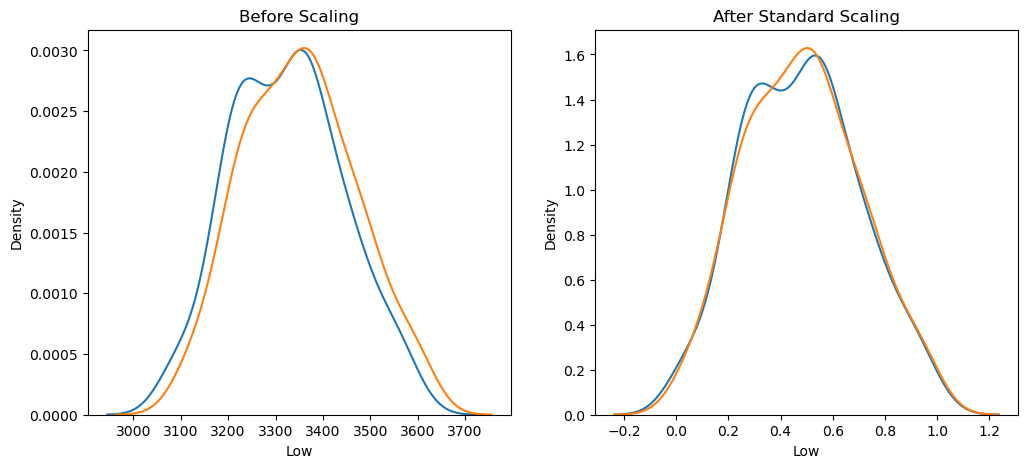

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Low'], ax=ax1)
sns.kdeplot(X_train['Close'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Low'], ax=ax2)
sns.kdeplot(X_train_scaled['Close'], ax=ax2)
plt.show()

<h2>Comparison of Distributions</h2>

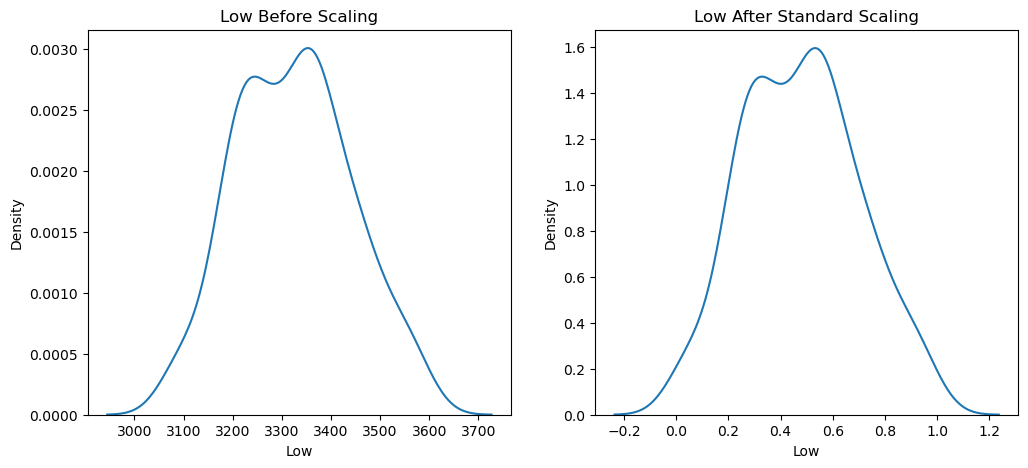

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Low Before Scaling')
sns.kdeplot(X_train['Low'], ax=ax1)

# after scaling
ax2.set_title('Low After Standard Scaling')
sns.kdeplot(X_train_scaled['Low'], ax=ax2)
plt.show()

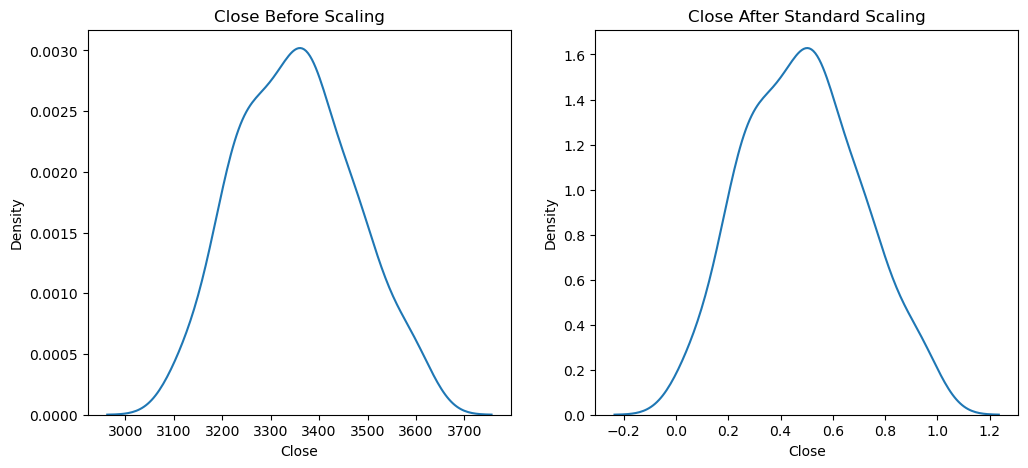

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Close Before Scaling')
sns.kdeplot(X_train['Close'], ax=ax1)

# after scaling
ax2.set_title('Close After Standard Scaling')
sns.kdeplot(X_train_scaled['Close'], ax=ax2)
plt.show()